## Question 4

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

%matplotlib inline
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

# |0> state

/Users/thomasbijucheeramvelil/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/thomasbijucheeramvelil/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/thomasbijucheeramvelil/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/thomasbijucheeramvelil/Li

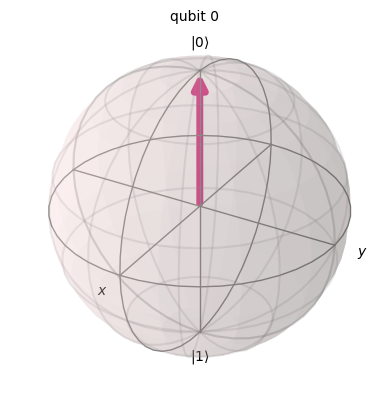

In [2]:
qc1 = QuantumCircuit(1)

qc1.save_statevector()
state = sim.run(qc1).result().get_statevector()
plot_bloch_multivector(state)

In representation of |0> on the Bloch sphere, theta = 0 (spherical coordinates), and so, it is represented as the north pole of the Bloch sphere ((0,0,1) in Cartesian coordinates).

# |1> state

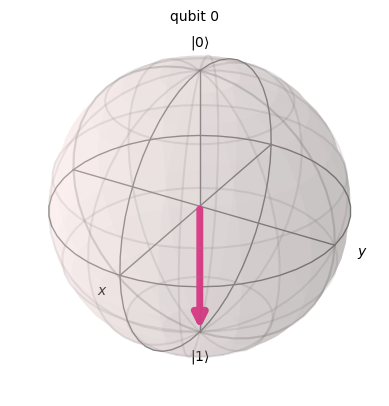

In [3]:
qc2 = QuantumCircuit(1)
qc2.x(0)

qc2.save_statevector()
state = sim.run(qc2).result().get_statevector()
plot_bloch_multivector(state)

In representation of |1> on the Bloch sphere, theta = pi (spherical coordinates), and so, it is represented as the south pole of the Bloch sphere ((0,0,-1) in Cartesian coordinates).

# (|0> + |1>)/sqrt(2)

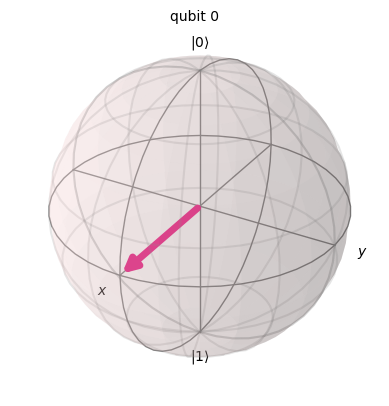

In [4]:
qc3 = QuantumCircuit(1)
qc3.h(0)

qc3.save_statevector()
state = sim.run(qc3).result().get_statevector()
plot_bloch_multivector(state)

In representation of (|0>+|1>)/sqrt(2) on the Bloch sphere, theta = pi/2, phi = 0 (spherical coordinates), and so, it is represented as the point of intersection of positive x axis with the Bloch sphere ((1,0,0) in Cartesian coordinates).

# (|0> - |1>)/sqrt(2)

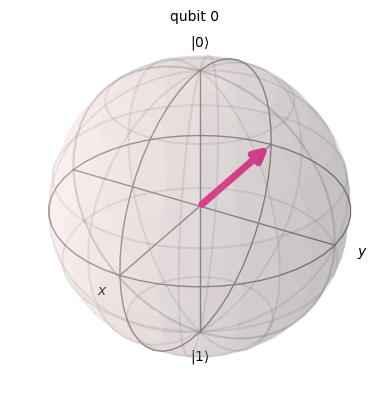

In [5]:
qc4 = QuantumCircuit(1)
qc4.x(0)
qc4.h(0)

qc4.save_statevector()
state = sim.run(qc4).result().get_statevector()
plot_bloch_multivector(state)

In representation of (|0>-|1>)/sqrt(2) on the Bloch sphere, theta = pi/2, phi = pi (spherical coordinates), and so, it is represented as the point of intersection of negative x axis with the Bloch sphere ((-1,0,0) in Cartesian coordinates).

# States opposite to each other on the Bloch sphere about the origin  are orthogonal.

|0> and |1> are opposite to each other on the Bloch sphere about the origin, and are orthogonal. Similarly, |+>=(|0>+|1>)/sqrt(2) and |->=(|0>-|1>)/sqrt(2) are orthogonal to each other and are opposite on the Bloch sphere. This is true in general, since if there are two states which are opposite on the Bloch sphere, (1,theta,phi) and (1,pi-theta,phi+pi), then the states can be shown to be orthogonal to each other. 

## Question 5

In [4]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
from math import sqrt, pi
from qiskit.visualization import array_to_latex, plot_state_qsphere

%matplotlib inline
sim = Aer.get_backend('aer_simulator')  # Telling Qiskit how to simulate our circuit

In [5]:
n = int(input("Enter number of qubits in state: "))

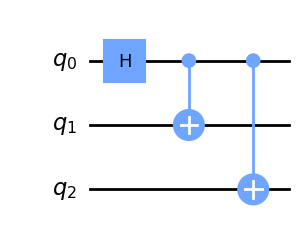

In [6]:
qc = QuantumCircuit(n)

qc.h(0) # Applying H-gate to the first qubit

for i in range(1,n):
    qc.cx(0,i) # Applying CNOT gates to other qubits
    
qc.draw(output='mpl')

In [7]:
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = sim.run(qobj).result()

# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

/var/folders/82/srlmmgqd5zvdmgypzncslyfr0000gn/T/ipykernel_33998/1985945288.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result()


<IPython.core.display.Latex object>

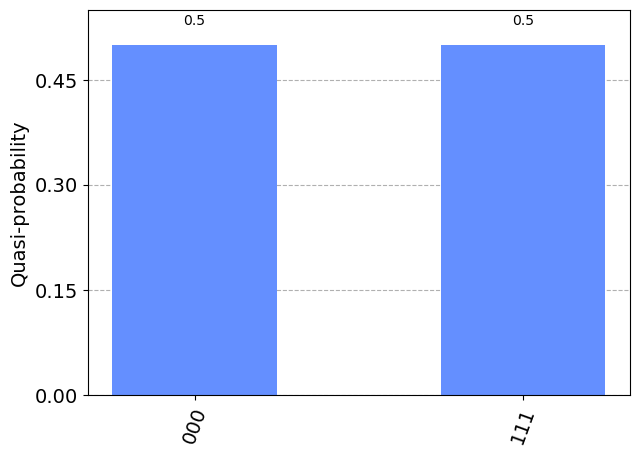

In [10]:
plot_histogram(result.get_counts())

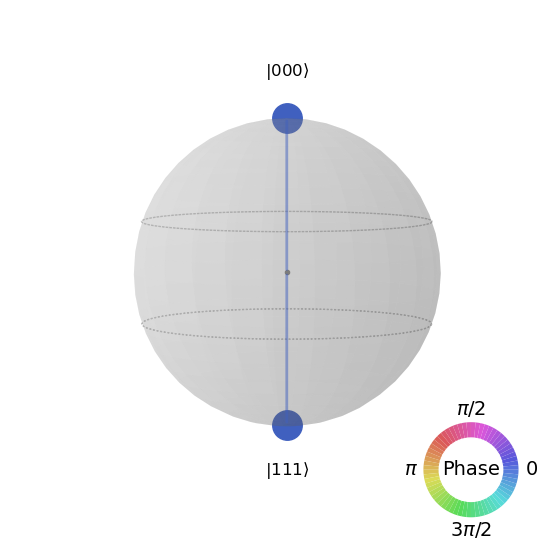

In [11]:
plot_state_qsphere(final_state)